# **Retail Sales Analysis: Insights from Superstore Data**

## Introduction

This notebook explores a sample sales dataset from a fictional Superstore. The goal of this analysis is to uncover meaningful business insights by examining trends in sales, profit, discounts, customer segments, product performance, and regional activity. Through data cleaning, exploration, and visualization, we aim to identify key patterns that can support better decision-making.


To begin, I'll load and get an overview of the dataset using **.info()** and **.head()**.

In [1]:
from analysis import load_sales_data
file_path = "data/sales.csv"
df = load_sales_data(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


After having viewed the data and understanding what information I'm working with, I'll begin the cleaning phase to ensure the data I'm using is accurate and produces reliable results.

## Cleaning

To start cleaning the data, I will load the Superstore dataset and run it through a basic cleaning function as well as running it through a validation function to check for problematic values - anything that doesn't make sense, like a negative amount of sales or a discount that isn't in the range of 0-100. The output will print any issues that get picked up.


In [2]:
from analysis import clean_sales_data, report_validation_issues
df = clean_sales_data(df)
report_validation_issues(df)


negative_sales — 0 rows

invalid_quantity — 0 rows

invalid_discount — 0 rows

extreme_profit — 0 rows


With no rows showing invalid values, it's time to move on to the EDA.

## Exploratory Data Analysis

Let’s jump into the data and check out some key numbers like totals and averages to get a quick feel for how the business is doing.

In [3]:
from analysis import sales_performance
sales_performance(df)

,Value
total_sales,"$2,297,200.86"
total_profit,"$286,397.02"
total_orders,5009
average_discount,15.62%
most_common_category,Office Supplies
most_common_region,West


To get a better understanding of which products are performing the best, I'll run functions that show the top 10 products by sales.

In [4]:
from analysis import top_sales_products
top_sales_products(df)

,Product Name,Sales,Profit
Rank,,,
1,Canon imageCLASS 2200 Advanced Copier,"$61,599.82","$25,199.93"
2,Fellowes PB500 Electric Punch Plastic Comb Bin...,"$27,453.38","$7,753.04"
3,Cisco TelePresence System EX90 Videoconferenci...,"$22,638.48","$-1,811.08"
4,HON 5400 Series Task Chairs for Big and Tall,"$21,870.58",$0.00
5,GBC DocuBind TL300 Electric Binding System,"$19,823.48","$2,233.51"
6,GBC Ibimaster 500 Manual ProClick Binding System,"$19,024.50",$760.98
7,Hewlett Packard LaserJet 3310 Copier,"$18,839.69","$6,983.88"
8,HP Designjet T520 Inkjet Large Format Printer ...,"$18,374.90","$4,094.98"
9,GBC DocuBind P400 Electric Binding System,"$17,965.07","$-1,878.17"


Similarly, it's important to see which products bring in the most profit.

In [5]:
from analysis import top_profit_products
top_profit_products(df)

,Product Name,Profit,Sales
Rank,,,
1,Canon imageCLASS 2200 Advanced Copier,"$25,199.93","$61,599.82"
2,Fellowes PB500 Electric Punch Plastic Comb Bin...,"$7,753.04","$27,453.38"
3,Hewlett Packard LaserJet 3310 Copier,"$6,983.88","$18,839.69"
4,Canon PC1060 Personal Laser Copier,"$4,570.93","$11,619.83"
5,HP Designjet T520 Inkjet Large Format Printer ...,"$4,094.98","$18,374.90"
6,Ativa V4110MDD Micro-Cut Shredder,"$3,772.95","$7,699.89"
7,"3D Systems Cube Printer, 2nd Generation, Magenta","$3,717.97","$14,299.89"
8,Plantronics Savi W720 Multi-Device Wireless He...,"$3,696.28","$9,367.29"
9,Ibico EPK-21 Electric Binding System,"$3,345.28","$15,875.92"


To give the business a better overview of which types of products are the most profitable, I'll break it down by the categories.

In [6]:
from analysis import profit_per_category
profit_per_category(df)

,Category,Profit
Rank,,
1,Technology,"$145,454.95"
2,Office Supplies,"$122,490.80"
3,Furniture,"$18,451.27"


Going even further, we can break it down by the sub-categories as well.

In [7]:
from analysis import profit_per_subcategory
profit_per_subcategory(df)

,Sub-Category,Profit
Rank,,
1,Copiers,"$55,617.82"
2,Phones,"$44,515.73"
3,Accessories,"$41,936.64"
4,Paper,"$34,053.57"
5,Binders,"$30,221.76"
6,Chairs,"$26,590.17"
7,Storage,"$21,278.83"
8,Appliances,"$18,138.01"
9,Furnishings,"$13,059.14"


To see how the business has been performing over time, let's compare the sales trends over the years.

In [8]:
from analysis import sales_over_years
sales_over_years(df, 'Order Date', 'Sales')

,Year,Total Sales
0,2014,"$484,247.50"
1,2015,"$470,532.51"
2,2016,"$609,205.60"
3,2017,"$733,215.26"


Additionally, I'll group sales by month to see how different times of the year compare. Understanding which months tend to be busier can help the business plan better for peak seasons.

In [9]:
from analysis import sales_over_months
sales_over_months(df)

c:\Users\Gunnar\Documents\sales-analysis\analysis.py:156: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trends = df.groupby('Month').agg({agg_col: 'sum'}).reset_index()


,Month,Total Sales
0,January,"$94,924.84"
1,February,"$59,751.25"
2,March,"$205,005.49"
3,April,"$137,762.13"
4,May,"$155,028.81"
5,June,"$152,718.68"
6,July,"$147,238.10"
7,August,"$159,044.06"
8,September,"$307,649.95"
9,October,"$200,322.98"


With this, we can see the most sales have happened during the fall and early winter months.

Now that I have a better understanding of the sales trends over time, I'll take a look into the performance of stores based on location.

In [10]:
from analysis import geographic_insights
geographic_insights(df)

,State,Sales,Profit
0,California,"$457,687.63","$76,381.39"
1,New York,"$310,876.27","$74,038.55"
2,Texas,"$170,188.05","$-25,729.36"
3,Washington,"$138,641.27","$33,402.65"
4,Pennsylvania,"$116,511.91","$-15,559.96"
5,Florida,"$89,473.71","$-3,399.30"
6,Illinois,"$80,166.10","$-12,607.89"
7,Ohio,"$78,258.14","$-16,971.38"
8,Michigan,"$76,269.61","$24,463.19"
9,Virginia,"$70,636.72","$18,597.95"


Let's also take a look into which customer base is bringing in the most sales/profit.

In [11]:
from analysis import segment_analysis
segment_analysis(df)

,Segment,Sales,Profit
0,Consumer,"$1,161,401.34","$134,119.21"
1,Corporate,"$706,146.37","$91,979.13"
2,Home Office,"$429,653.15","$60,298.68"


Next, I’ll take a look at the time it takes for orders to ship. Understanding the average, minimum, and maximum shipping times can highlight how efficient the fulfillment process is and where there might be room for improvement.

In [12]:
from analysis import order_to_ship_summary
order_to_ship_summary(df)

,Days
order_to_ship_average,3.958175
order_to_ship_min,0.000000
order_to_ship_max,7.000000


The business might want to understand the average discount applied and how many discounted orders were sold for each product category.

In [13]:
from analysis import category_discount_summary
category_discount_summary(df)

,Category,Sub-Category,Avg Discount,Discounted Orders
0,Office Supplies,Binders,0.478078,1186
1,Technology,Machines,0.409302,86
2,Office Supplies,Appliances,0.397949,195
3,Furniture,Furnishings,0.343005,386
4,Furniture,Tables,0.337449,247
5,Furniture,Bookcases,0.286548,168
6,Technology,Copiers,0.239130,46
7,Technology,Phones,0.237716,578
8,Furniture,Chairs,0.216942,484
9,Office Supplies,Fasteners,0.200000,89


Following the trends of discounts, let's see which discount values have resulted in the most sales and profit.

In [14]:
from analysis import get_discount_impact_summary
get_discount_impact_summary(df)

c:\Users\Gunnar\Documents\sales-analysis\analysis.py:212: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('Discount Bin').agg({


,Discount Bin,Sales,Profit,Quantity
0,"(0.0, 0.1]",54369.3510,9029.1770,373
1,"(0.1, 0.2]",792152.8895,91756.2975,13858
2,"(0.2, 0.3]",103226.6550,-10369.2774,849
3,"(0.3, 0.4]",130911.2428,-25448.1881,891
4,"(0.4, 0.5]",64403.5140,-22999.5392,286
5,"(0.5, 1.0]",64228.7380,-76559.0513,3349


It might be hard to interpret the affects of discount vs. profit in this format, so I'll create a chart to visualize the same data.

# Visualizations

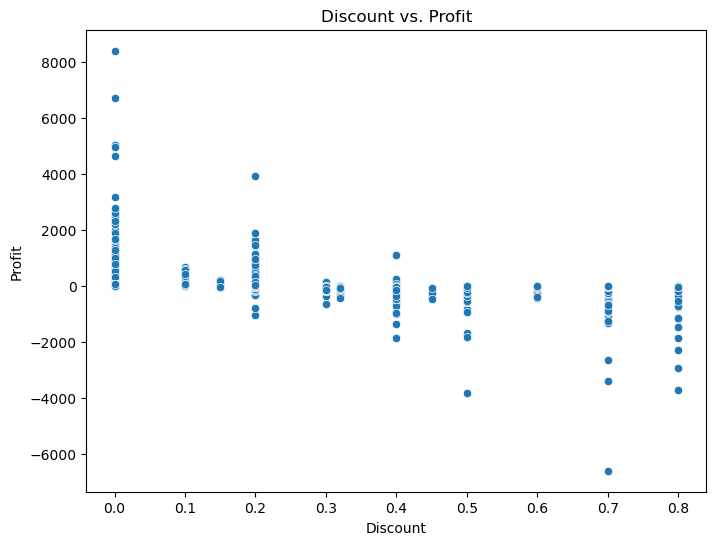

,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


In [15]:
from analysis import plot_profit_vs_discount
plot_profit_vs_discount(df)

Given the chart and the correlation statistics, we can see that there is a negative correlation between the two - meaning as discount increases, profit tends to decrease.

While I summarized the data for sales over time earlier in the analysis, the business might want to have this information visualized so its easier to see the trends at a quick glance - this is what a chart of that looks like:

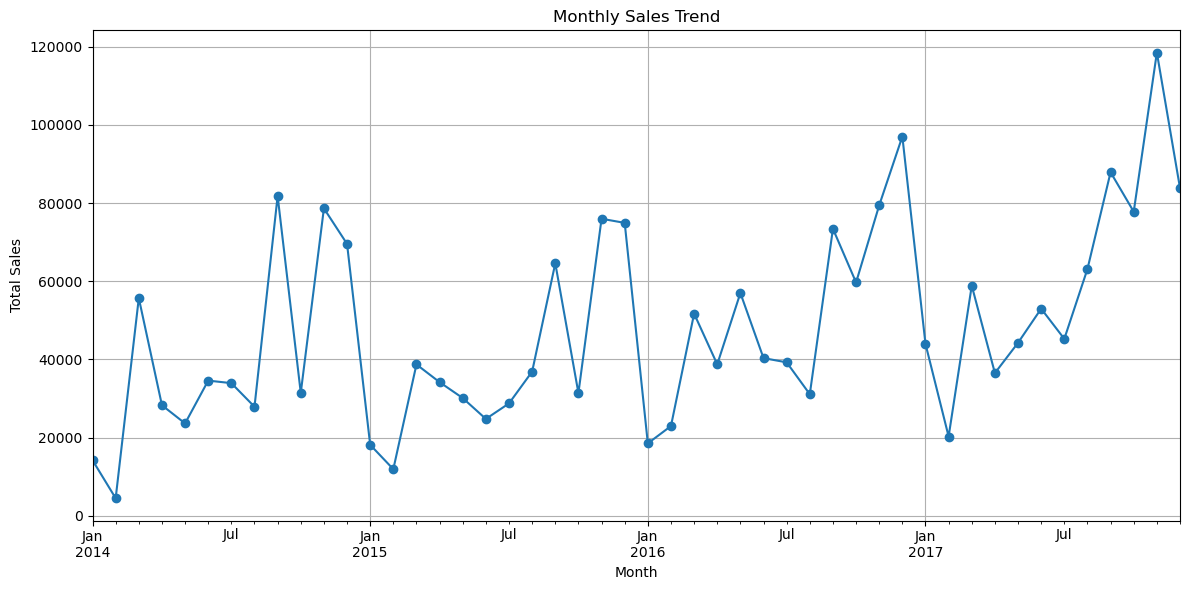

In [16]:
from analysis import plot_monthly_sales_trend
plot_monthly_sales_trend(df)

Lastly, I'll do the same thing for the top products:

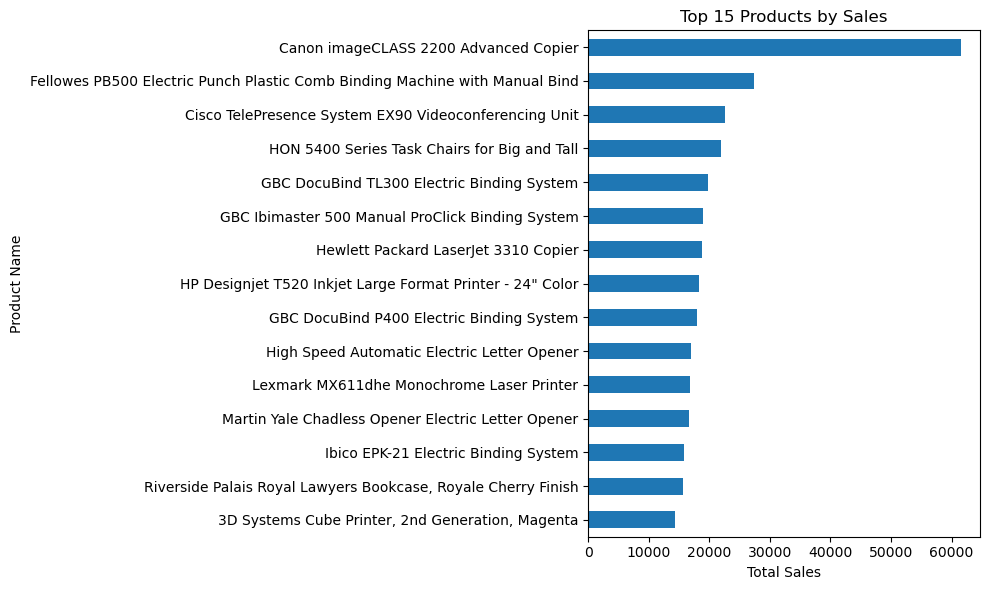

In [ ]:
from analysis import plot_top_products_by_sales
plot_top_products_by_sales(df,top_n=10)

# Conclusion

This analysis covered several important steps to understand the sales data and uncover actionable insights, including:

- Cleaning and preparing the dataset to ensure accuracy  
- Identifying top-performing products and categories driving revenue  
- Examining monthly sales trends to reveal seasonal effects   
- Exploring the impact of discounts, showing a negative correlation with profit  
- Visualizing data to highlight key trends and patterns  

Together, these insights provide a solid foundation to guide pricing, inventory management, and marketing strategies, helping the business make informed decisions moving forward.
